# Cognitive Algorithms - Assignment 3 (30 points)
Cognitive Algorithms        
Summer term 2018      
Technische Universität Berlin     
Fachgebiet Maschinelles Lernen 

**Due on June 13, 2018 10am via ISIS **
                    
After completing all tasks, run the whole notebook so that the content of each cell is properly displayed. Make sure that the code was ran and the entire output (e.g. figures) is printed. Print the notebook as a PDF file and again make sure that all lines are readable - use line breaks in the Python Code '\' if necessary. Points will be deducted, if code or content is not readable!                  
           
**Upload the PDF file that contains a copy of your notebook on ISIS.** 

Group:        
Members:          

# Part 1: Theory (3 points)
**A) (2 points)** Explain briefly the goal of classification and regression. What is the difference between both tasks?

**[Your answer for A) here]**

**B)** Which statement is true?
- [ ] Classification is a supervised learning task, regression is an unsupervised learning task.       
- [ ] Classification is an unsupervised learning task, regression is a supervised learning task.      
- [x] Classification and regression are both supervised learning tasks.                 
- [ ] Classification and regression are both unsupervised learning tasks.               

# Part 2: Programming (27 points)
---
Note that part 2 of this assignment consists of two tasks.

### Task 1: Ordinary Least Squares (9 points)
In this assignment you will implement a linear regression and predict two dimensional hand positions from electromyographic (EMG) recordings obtained with high-density electrode arrays on the lower arm.  Download the data set ```myo_data.mat``` from the ISIS web site, if not done yet. 

In [1]:
import pylab as pl
import scipy as sp
from numpy.linalg import inv
from scipy.io import loadmat
%matplotlib inline

In [92]:
def load_myo_data(fname):
    ''' Loads EMG data from <fname>                      
    '''
    # load the data
    data = loadmat(fname)
    # extract data and hand positions
    X = data['training_data']
    X = sp.log(X)
    Y = data['training_labels']
    #Split data into training and test data
    X_train = X[:, :5000]
    X_test = X[:, 5000:]
    Y_train = Y[:, :5000]
    Y_test = Y[:, 5000:]
    return X_train,Y_train,X_test, Y_test


def train_ols(X_train, Y_train, llambda = 0):
    ''' Trains ordinary least squares (ols) regression 
    Input:       X_train  -  DxN array of N data points with D features
                 Y        -  D2xN array of length N with D2 multiple labels
                 llabmda  -  Regularization parameter
    Output:      W        -  DxD2 array, linear mapping used to estimate labels 
                             with sp.dot(W.T, X)                      
    '''
    #your code here
    D,N = sp.shape(X_train)
    A = X_train.dot(sp.transpose(X_train)) + llambda*sp.eye(D)
    W = inv(A).dot(X_train.dot(sp.transpose(Y_train)))
    return W
    
def apply_ols(W, X_test):
    ''' Applys ordinary least squares (ols) regression 
    Input:       X_test    -  DxN array of N data points with D features
                 W        -  DxD2 array, linear mapping used to estimate labels 
                             trained with train_ols                   
    Output:     Y_test    -  D2xN array
    '''
    #your code here
    D,N = sp.shape(X_test)
    Y_test = sp.transpose(W).dot(X_test)
    return Y_test
    
    
def predict_handposition():
    X_train,Y_train,X_test, Y_test = load_myo_data('myo_data.mat')
    # compute weight vector with linear regression
    W = train_ols(X_train, Y_train)
    # predict hand positions
    Y_hat_train = apply_ols(W, X_train)
    Y_hat_test = apply_ols(W, X_test) 
        
    pl.figure(figsize=(8,6))
    pl.subplot(2,2,1)
    pl.plot(Y_train[0,:1000],Y_train[1,:1000],'.k',label = 'true')
    pl.plot(Y_hat_train[0,:1000],Y_hat_train[1,:1000],'.r', label = 'predicted')
    pl.title('Training Data')
    pl.xlabel('x position')
    pl.ylabel('y position')
    pl.legend(loc = 0)
    
    pl.subplot(2,2,2)
    pl.plot(Y_test[0,:1000],Y_test[1,:1000],'.k')
    pl.plot(Y_hat_test[0,:1000],Y_hat_test[1,:1000],'.r')
    pl.title('Test Data')
    pl.xlabel('x position')
    pl.ylabel('y position')
    
    pl.subplot(2,2,3)
    pl.plot(Y_train[1,:600], 'k', label = 'true')
    pl.plot(Y_hat_train[1,:600], 'r--', label = 'predicted')
    pl.xlabel('Time')
    pl.ylabel('y position')
    pl.legend(loc = 0)
    
    pl.subplot(2,2,4)
    pl.plot(Y_test[1,:600],'k')
    pl.plot(Y_hat_test[1,:600], 'r--')
    pl.xlabel('Time')
    pl.ylabel('y position')
    
def test_assignment4():
    ##Example without noise
    x_train = sp.array([[ 0,  0,  1 , 1],[ 0,  1,  0, 1]])
    y_train = sp.array([[0, 1, 1, 2]])
    w_est = train_ols(x_train, y_train) 
    w_est_ridge = train_ols(x_train, y_train, llambda = 1)
    assert(sp.all(w_est.T == [[1, 1]])) 
    assert(sp.all(w_est_ridge.T == [[.75, .75]]))
    y_est = apply_ols(w_est,x_train)
    assert(sp.all(y_train == y_est)) 
    print ('No-noise-case tests passed')
    
    ##Example with noise
    #Data generation
    w_true = 4
    X_train = sp.arange(10)
    X_train = X_train[None,:]
    Y_train = w_true * X_train + sp.random.normal(0,2,X_train.shape)
    #Regression 
    w_est = train_ols(X_train, Y_train) 
    Y_est = apply_ols(w_est,X_train)
    #Plot result
    pl.figure()
    pl.plot(X_train.T, Y_train.T, '+', label = 'Train Data')
    pl.plot(X_train.T, Y_est.T, label = 'Estimated regression')
    pl.xlabel('x')
    pl.ylabel('y')
    pl.legend(loc = 'lower right')

** A) (5 points)** Implement ordinary least squares regression (OLS) with an optional ridge parameter by completing the function stubs  ```ols_train``` and  ```ols_apply```. In ```ols_train```, you estimate a linear mapping $W$,    
$$W = (X_{\text{train}}X_{\text{train}}^{\top} + \lambda I)^{-1}X_{\text{train}}Y_{\text{train}}^{\top}$$       
that optimally predicts the training labels from the training data, $X_{\text{train}} \in \mathbb{R}^{D_X \times N_{tr}}$,  $Y_{\text{train}} \in\mathbb{R}^{D_Y \times N_{tr}}$. Here, $\lambda \in \mathbb R$ is the (optional) Ridge regularization parameter.  
The function ```ols_apply``` than uses the weight vector to predict the (unknown) hand positions of new test data $X_{\text{test}} \in\mathbb{R}^{D_X \times N_{te}}$     
$$Y_{\text{test}} = W^{\top}X_{\text{test}}$$         
The function  ```test_assignment4``` helps you to debug your code.

No-noise-case tests passed


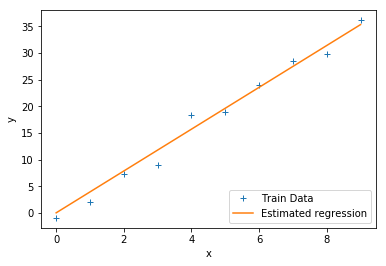

In [66]:
test_assignment4()

**B) (1 point)**  The data set ```myo_data.mat``` consists of preprocessed EMG data $X$ and 2-dimensional stimulus labels $Y$. Labels are x/y positions of the hand during different hand movements. The function  ```load_myo_data```  loads the data and splits it into train and test data. Familiarize yourself with the data by answering the following questions:         
How many time points $N_{tr}$ does the train set contain? How many time points $N_{te}$ does the test set contain? At each time point, at how many electrodes $D_X$ was the EMG collected? 

$N_{tr} =$ **[Your answer here]**                   
$N_{te} =$ **[Your answer here]**                        
$D_{X} =$ **[Your answer here]**                   

**C) (1 points)** Predict two dimensional hand positions by calling the function ```predict_handpositions```. It plots, for the train and the test data, the true hand position versus the estimated hand position. Do you notice a performance difference between train and test data set? Is this a surprising result?

Answer : **Test Data performs better than Train data, it can be said as an inbuilt property of OLS algorithm**

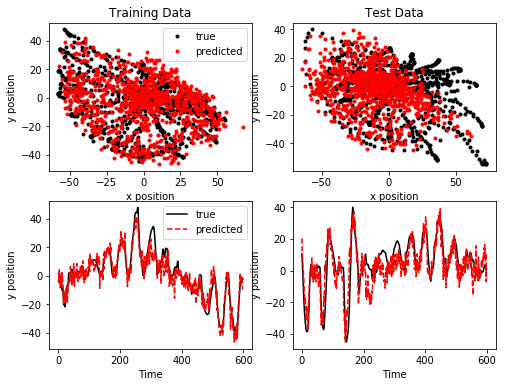

In [93]:
predict_handposition()

**D) (1 points)** In the previous tasks, we have used the logarithmized muscle activiations to predict the hand positions. Comment the line where we logarithmize the EMG features in the function  ```load_myo_data``` and call  ```predict_handpositions``` again. Do you notice a performance difference compared to the logarithmized version? Why?

Answer: **The performance of Training data has reduced compared to the logarithmic version. As, logarithmic function linearize the data relation and so good in performance**

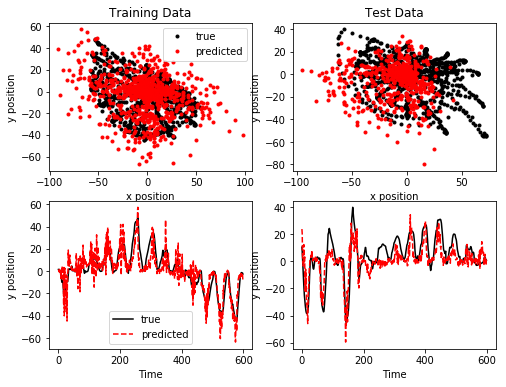

In [91]:
predict_handposition()

**E) (1 points)** If we cannot predict the labels $Y$ perfectly by a linear regression on $X$, does this imply that the relationship between $X$ and $Y$ is non-linear? Explain your decision.

**Yes, the relatioship between X and Y is Non-linear and that is why we take the logarithmic funstion to make this relation linear and so efficient. **

### Task 2: Polynomial Regression (18 points)
In task 1 you implemented linear regression. However, you will see in this task, that aboves code can be generalized to polynomial regression.

**A) (9 points)**  Write a function  ```test_polynomial_regression``` which generates toy data and visualizes the results from a polynomial regression. The goal is to create two plots as in the Figure below (Note that your figure will look slightly different, because the data is generated randomly.)     
To do so, first create toy data from a sine function as follows:           
$$x_i \in \{0, 1, 2, \ldots, 10\}, y_i = \sin(x_i) + \epsilon_i, \; \; \epsilon_i \sim \mathcal{N}(0, 0.5)$$        
where $\mathcal{N}$(mean, standard deviation) denotes the Gaussian distribution and $i \in \{1, 2, \ldots, 11\}$ is an index. Then implement polynomial regression, which models the relationship between $y$ and $x$ as an $m$th order polynomial, i.e. 
$\hat{y} = w_0 + w_1 x + w_2 x^2 + \ldots + w_m x^m$. The parameters $w_0, w_1, \ldots , w_m \in \mathbb R$ are estimated by Ridge Regression. 

*Hint:* You can use your functions ```ols_train``` and  ```ols_apply```, if you build an appropriate data matrix (for loops are allowed to do so).

Apply and visualize polynomial ridge regression for different parameters.

![Figure_1](Figure_1.png)

In [87]:
#your code here
def test_polynomial_regression():
    X = sp.arange(10)
    Y = sp.sign(X) + sp.random.normal(0, 0.5,X.shape)
    pl.scatter(X,Y)
    Y_hat = list();
    
    m = 10
    for i in range(1, m+1):
        print (sp.vstack((sp.ones(X.shape),X)))
        w = train_ols(sp.vstack((sp.ones(X.shape),X)), Y)
        y = apply_ols(w, X)
        Y_hat.append(y)
    print (Y_hat)
        

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]]


ValueError: not enough values to unpack (expected 2, got 1)

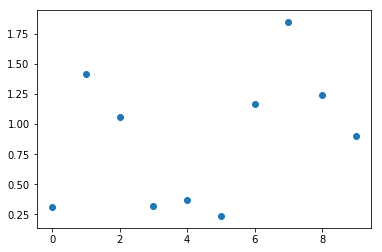

In [88]:
test_polynomial_regression()  

**B) (9 points)** Run your code of task A) multiple times.
- (4 points) What do you observe for the different values of the parameters $m$ and $\lambda$? Explain this behaviour. 
- (2 points) Decide for each of the two figures which values of the parameters yield the best fit. 
- (3 points) Do you expect those parameters to perform good on all possible data sets? Explain your decision.

**[Your answers for B) here]**